In [14]:
import staintools
import csv
import os
import glob
import re
from pandas import DataFrame, Series
from PIL import Image
import timeit
import time
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_paths = ["../data_segments/data_balanced_duplicate_sample/train/EE/"]

In [3]:
# get images
images = {}
images_by_folder = {}
for train_path in train_paths:
    images_by_folder[str(train_path)] = []
    files = glob.glob(os.path.join(train_path, '*.jpg'))
    for fl in files:
        flbase = os.path.basename(fl)
        flbase_noext = os.path.splitext(flbase)[0]
        images[flbase_noext]=fl
        images_by_folder[str(train_path)].append(flbase_noext)

In [4]:
# initialize stain and brightness normalizer
stain_normalizer = staintools.StainNormalizer(method='vahadane')
standardizer = staintools.BrightnessStandardizer()

In [5]:
# choose target image
target_image = staintools.read_image("../data_segments/data_balanced_duplicate_sample/valid/Celiac/C06-27_01_1000_2000_0.jpg")
standard_target_image = standardizer.transform(target_image)
stain_normalizer.fit(standard_target_image)

In [6]:
# get destination path
path_change_map = {}

for key in list(images_by_folder.keys()):
    temp = key.replace('..', '/scratch/as3ek')
    path_change_map[key] = temp

In [ ]:
count = 0
for key in images_by_folder.keys():
    for value in list(images_by_folder[key]):
        count += 1
        if count < 3637:
            continue
#         print(key)
#         print(value)
        print (str(count) + ' ' + str(value))
        source_img_path = str(key) + str(value) + '.jpg'
        dest_img_path = str(path_change_map[key]) + str(value) + '.jpg'
#         print(source_img_path)
        img = staintools.read_image(source_img_path)
        if (np.mean(img) > 240) or (np.mean(img) < 10):
            continue
        # standardize brightness
        img_standard = standardizer.transform(img)
        # transform the images
        img_normalized = stain_normalizer.transform(img_standard)
        # write image to path

#             plt.imshow(img)
#             plt.title('my picture')
#             plt.show()
#             plt.imshow(img_normalized)
#             plt.title('my picture')
#             plt.show()

        if (count % 10000 == 0):
            plt.imshow(img)
            plt.title('my picture')
            plt.show()
            plt.imshow(img_normalized)
            plt.title('my picture')
            plt.show()
            print(value + ' Saved! Count: ' + str(count) + '  \n ' + str(dest_img_path))
        cv2.imwrite(os.path.normpath(dest_img_path), img_normalized)

3637 130370_6722_001_6900_11700_0
3638 130379_6731_002_4773_2442_0
3639 130369_6721_001_8250_12625_0
3640 22_3750_1500_0
3641 130378_6730_002_1998_6327_0
3642 50_5312_7304_0
3643 130373_6725_001_3774_1554_0
3644 87_600_5000_0
3645 84_3652_5312_0
3646 130365_6716_001_2775_4551_0
3647 130373_6725_001_3500_1800_0
3648 130373_6725_002_3976_1136_0
3649 130369_6721_001_5500_11700_0
3650 130369_6721_001_5112_11360_0
3651 59_3200_4000_0
3652 130373_6725_001_3375_2125_0
3653 130379_6731_002_1200_3100_0
3654 35_6806_3652_0
3655 130369_6721_001_5106_12432_0
3656 130369_6721_001_2500_2750_0
3657 130379_6731_002_2490_6142_0
3658 84_5312_1992_0
3659 73_4648_4648_0
3660 130369_6721_001_5625_12625_0
3661 35_6000_5400_0
3662 130378_6730_002_1400_3500_0
3663 130376_6728_001_1500_500_0
3664 130369_6721_001_8000_10100_0
3665 130373_6725_001_2272_2982_0
3666 130373_6725_001_1625_3750_0
3667 130370_6722_001_300_11800_0
3668 130382_6718_001_1625_3875_0
3669 130379_6731_002_2220_4884_0


/home/as3ek/.local/lib/python3.6/site-packages/staintools/utils/misc_utils.py:56: RuntimeWarning: invalid value encountered in true_divide
  return A / np.linalg.norm(A, axis=1)[:, None]
/home/as3ek/.local/lib/python3.6/site-packages/staintools/stain_normalizer.py:42: RuntimeWarning: divide by zero encountered in true_divide
  source_concentrations *= (self.maxC_target / maxC_source)
/home/as3ek/.local/lib/python3.6/site-packages/staintools/stain_normalizer.py:42: RuntimeWarning: invalid value encountered in multiply
  source_concentrations *= (self.maxC_target / maxC_source)


3670 130378_6730_002_1500_5100_0
3671 84_1250_2500_0
3672 50_1992_3984_0
3673 130379_6731_001_1000_5625_0
3674 130370_6722_001_3124_14058_0
3675 59_3250_4000_0
3676 29_1800_200_0
3677 130365_6716_001_2300_3400_0
3678 84_4482_1328_0
3679 85_2988_2490_0
3680 35_2158_5312_0
3681 29_4316_2158_0
3682 29_1494_1826_0
3683 130380_6726_001_1992_498_0
3684 130369_6721_001_1000_17700_0
3685 130370_6722_001_7125_13000_0
3686 59_8000_2000_0
3687 58_7992_3330_0
3688 130378_6730_002_750_7250_0
3689 130380_6726_001_1800_400_0
3690 130370_6722_001_3692_12922_0
3691 130379_6731_001_2700_3900_0
3692 111_5810_4980_0
3693 130373_6725_002_400_3600_0
3694 130373_6725_001_2331_3552_0
3695 42_4200_4600_0
3696 130369_6721_001_9750_10500_0
3697 130369_6721_001_1500_2875_0
3698 79_5800_5200_0
3699 108_2400_3200_0
3700 42_5328_3996_0
3701 84_6660_1998_0
3702 130373_6725_001_2822_1494_0
3703 59_4400_200_0
3704 130380_6726_001_1420_852_0
3705 130378_6730_001_2158_3652_0
3706 22_1400_1600_0
3707 50_5750_2000_0
3708 1

3980 130379_6731_002_2300_5000_0
3981 130372_6724_001_3625_1500_0
3982 130372_6724_001_2900_1400_0
3983 58_4400_1600_0
3984 130370_6722_001_7000_11700_0
3985 59_6660_3996_0
3986 130376_6728_001_2982_710_0
3987 111_1500_4000_0
3988 85_4648_6308_0
3989 29_5328_4995_0
3990 77_2158_4482_0
3991 130379_6731_002_2200_5100_0
3992 87_2988_6308_0
3993 130372_6724_001_3124_6390_0
3994 77_3663_5661_0
3995 130379_6731_002_3500_3200_0
3996 130370_6722_001_4875_13250_0
3997 58_6308_4316_0
3998 85_4482_6806_0
3999 130378_6730_001_994_5822_0
4000 59_1000_1800_0
4001 59_4980_2158_0


In [ ]:
path_change_map

In [ ]:
list(images_by_folder.keys())[0]

In [21]:
images_by_folder[list(images_by_folder.keys())[0]][3637]

'130379_6731_002_4773_2442_0'

In [28]:
value = list(images_by_folder[list(images_by_folder.keys())[0]])[3637]

In [29]:
len(list(images_by_folder[list(images_by_folder.keys())[0]])[3637:])

131184

In [30]:
source_img_path = str(key) + str(value) + '.jpg'

In [31]:
source_img_path

'../data_segments/data_balanced_duplicate_sample/train/EE/130379_6731_002_4773_2442_0.jpg'

In [32]:
img = staintools.read_image(source_img_path)

In [33]:
np.mean(img)

242.99700927734375

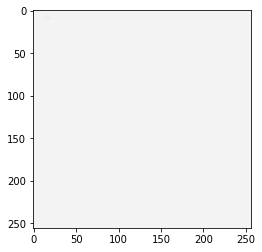

In [34]:
plt.imshow(img)